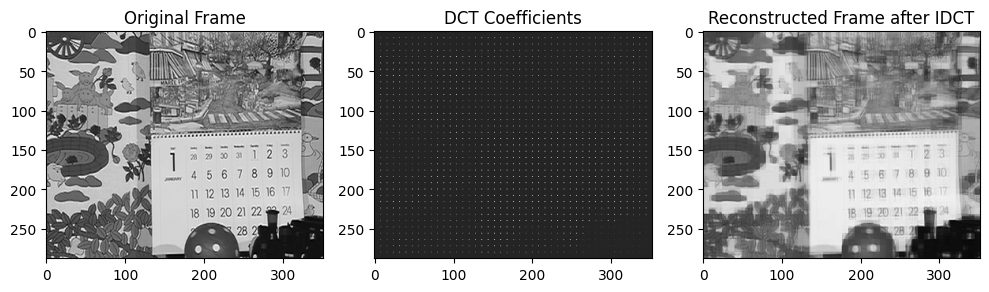

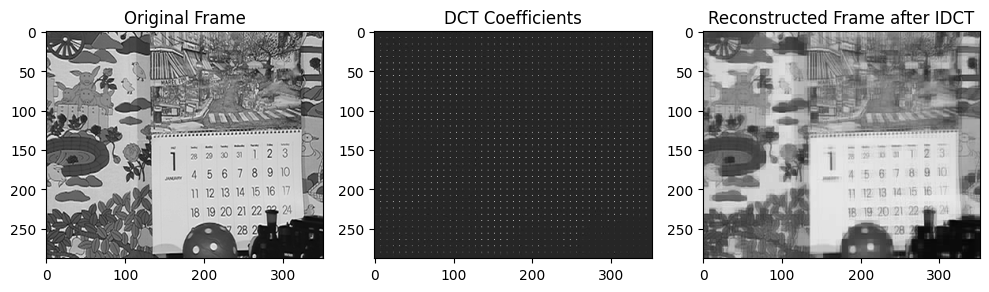

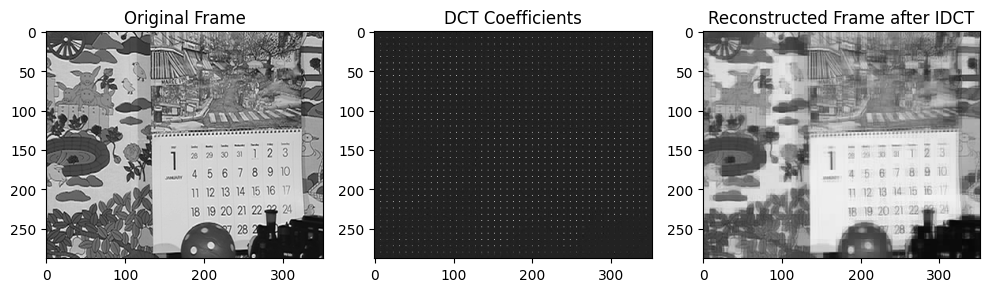

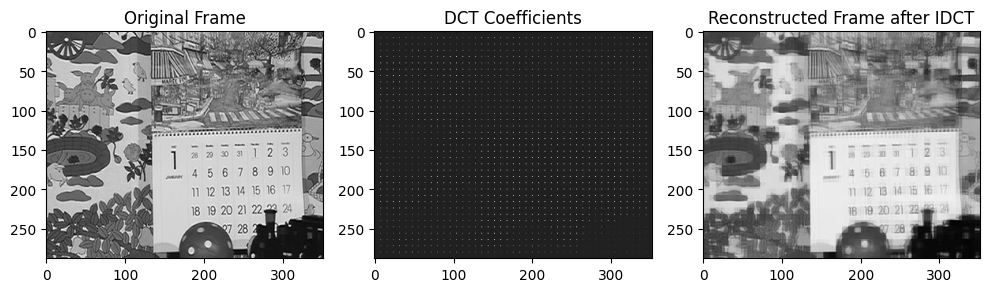

KeyboardInterrupt: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

def performDCT_2D(f):
    F = np.zeros_like(f, dtype=float)
    height, width = f.shape

    for u in range(8):
        for v in range(8):
            sum = 0.0
            Cu = 1.0 if u == 0 else 1.0 / math.sqrt(2.0)
            Cv = 1.0 if v == 0 else 1.0 / math.sqrt(2.0)
            for x in range(8):
                for y in range(8):
                    sum += f[x, y] * math.cos((2 * x + 1) * u * math.pi / 16) * math.cos((2 * y + 1) * v * math.pi / 16)
            F[u, v] = 0.25 * Cu * Cv * sum

    return F

def iDCT_2d(F):
    f = np.zeros_like(F, dtype=float)
    for x in range(8):
        for y in range(8):
            sum = 0.0
            for u in range(8):
                for v in range(8):
                    Cu = 1.0 / math.sqrt(2.0) if u == 0 else 1.0
                    Cv = 1.0 / math.sqrt(2.0) if v == 0 else 1.0
                    sum += Cu * Cv * F[u, v] * math.cos((2 * x + 1) * u * math.pi / 16) * math.cos((2 * y + 1) * v * math.pi / 16.0)
            f[x, y] = sum * 0.25

    return f

def read_yuv_frames(filename, width, height):
    frames = []

    num_bytes_per_frame = width * height * 1.5  # Assuming 4:2:0 chroma subsampling

    with open(filename, 'rb') as f:
        while True:
            yuv_data = f.read(int(num_bytes_per_frame))
            if not yuv_data:
                break
            y = yuv_data[0: width * height]
            y = np.reshape(np.frombuffer(y, dtype=np.uint8), (height, width))
            frames.append(y)

    return frames

def apply_quantization(F, Q):
    quantized_F = np.zeros_like(F, dtype=float)
    for u in range(8):
        for v in range(8):
            quantized_F[u, v] = np.round(F[u, v] / Q[u][v])
    return quantized_F

def apply_inverse_quantization(quantized_F, Q):
    F = np.zeros_like(quantized_F, dtype=float)
    for u in range(8):
        for v in range(8):
            F[u, v] = quantized_F[u, v] * Q[u][v]
    return F

def main():
    Q = [[16, 11, 10, 16, 24, 40, 51, 61],
         [12, 12, 14, 19, 26, 58, 60, 55],
         [14, 13, 16, 24, 40, 57, 69, 56],
         [14, 17, 22, 29, 51, 87, 80, 62],
         [18, 22, 37, 56, 68, 109, 103, 77],
         [24, 35, 55, 64, 81, 104, 113, 92],
         [49, 64, 78, 87, 103, 121, 120, 101],
         [72, 92, 95, 98, 112, 100, 103, 99]]

    frames = read_yuv_frames("/content/mobile_cif.yuv", 352, 288)
    num_frames = len(frames)

    dct_sequence = []
    idct_sequence = []

    for i in range(num_frames):
        frame = frames[i]
        dct_frame = np.zeros_like(frame, dtype=float)
        idct_frame = np.zeros_like(frame, dtype=float)

        # Perform DCT for each 8x8 block
        for x in range(0, 288, 8):
            for y in range(0, 352, 8):
                block = frame[x:x+8, y:y+8]
                dct_block = performDCT_2D(block)
                dct_frame[x:x+8, y:y+8] = dct_block

                # Apply quantization and inverse quantization
                quantized_block = apply_quantization(dct_block, Q)
                inverse_quantized_block = apply_inverse_quantization(quantized_block, Q)

                # Perform IDCT
                idct_block = iDCT_2d(inverse_quantized_block)
                idct_frame[x:x+8, y:y+8] = idct_block

        dct_sequence.append(dct_frame)
        idct_sequence.append(idct_frame)


        # Plot original and reconstructed frames
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(frame, cmap='gray')
        plt.title('Original Frame')

        plt.subplot(1, 3, 2)
        plt.imshow(dct_frame, cmap='gray')
        plt.title('DCT Coefficients')

        plt.subplot(1, 3, 3)
        plt.imshow(idct_frame, cmap='gray')
        plt.title('Reconstructed Frame after IDCT')

        plt.tight_layout()
        plt.show()

main()


Generating yuv sequence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def performDCT_2D(f):
    F = np.zeros_like(f, dtype=float)
    height, width = f.shape

    for u in range(8):
        for v in range(8):
            sum = 0.0
            Cu = 1.0 if u == 0 else 1.0 / math.sqrt(2.0)
            Cv = 1.0 if v == 0 else 1.0 / math.sqrt(2.0)
            for x in range(8):
                for y in range(8):
                    sum += f[x, y] * math.cos((2 * x + 1) * u * math.pi / 16) * math.cos((2 * y + 1) * v * math.pi / 16)
            F[u, v] = 0.25 * Cu * Cv * sum

    return F

def iDCT_2d(F):
    f = np.zeros_like(F, dtype=float)
    for x in range(8):
        for y in range(8):
            sum = 0.0
            for u in range(8):
                for v in range(8):
                    Cu = 1.0 / math.sqrt(2.0) if u == 0 else 1.0
                    Cv = 1.0 / math.sqrt(2.0) if v == 0 else 1.0
                    sum += Cu * Cv * F[u, v] * math.cos((2 * x + 1) * u * math.pi / 16) * math.cos((2 * y + 1) * v * math.pi / 16.0)
            f[x, y] = sum * 0.25

    return f

def read_yuv_frames(filename, width, height):
    frames = []

    num_bytes_per_frame = width * height * 1.5  # Assuming 4:2:0 chroma subsampling

    with open(filename, 'rb') as f:
        while True:
            yuv_data = f.read(int(num_bytes_per_frame))
            if not yuv_data:
                break
            y = yuv_data[0: width * height]
            y = np.reshape(np.frombuffer(y, dtype=np.uint8), (height, width))
            frames.append(y)

    return frames

def apply_quantization(F, Q):
    quantized_F = np.zeros_like(F, dtype=float)
    for u in range(8):
        for v in range(8):
            quantized_F[u, v] = np.round(F[u, v] / Q[u][v])
    return quantized_F

def apply_inverse_quantization(quantized_F, Q):
    F = np.zeros_like(quantized_F, dtype=float)
    for u in range(8):
        for v in range(8):
            F[u, v] = quantized_F[u, v] * Q[u][v]
    return F

def main():
    Q = [[16, 11, 10, 16, 24, 40, 51, 61],
         [12, 12, 14, 19, 26, 58, 60, 55],
         [14, 13, 16, 24, 40, 57, 69, 56],
         [14, 17, 22, 29, 51, 87, 80, 62],
         [18, 22, 37, 56, 68, 109, 103, 77],
         [24, 35, 55, 64, 81, 104, 113, 92],
         [49, 64, 78, 87, 103, 121, 120, 101],
         [72, 92, 95, 98, 112, 100, 103, 99]]

    frames = read_yuv_frames("/content/foreman.yuv", 352, 288)
    num_frames = len(frames)

    idct_sequence = []

    with open('reconstructedForeman.yuv', 'wb') as f_out:
        for i in range(num_frames):
            frame = frames[i]
            idct_frame = np.zeros_like(frame, dtype=float)

            # Perform DCT and IDCT for each 8x8 block
            for x in range(0, 288, 8):
                for y in range(0, 352, 8):
                    block = frame[x:x+8, y:y+8]
                    dct_block = performDCT_2D(block)

                    # Apply quantization and inverse quantization
                    quantized_block = apply_quantization(dct_block, Q)
                    inverse_quantized_block = apply_inverse_quantization(quantized_block, Q)

                    # Perform IDCT
                    idct_block = iDCT_2d(inverse_quantized_block)
                    idct_frame[x:x+8, y:y+8] = idct_block

            # Convert back to uint8 and save to YUV file
            idct_frame = np.round(idct_frame).astype(np.uint8)
            idct_sequence.append(idct_frame)

            # Flatten and write frame to YUV file
            f_out.write(idct_frame.flatten())

    print(f'Reconstructed frames saved to "reconstructed.yuv"')

main()


Reconstructed frames saved to "reconstructed.yuv"
